# Week 1: 
This course is structured to hit the key conceptual ideas of normalization, exploratory analysis, linear modeling, testing, and multiple testing that arise over and over in genomic studies.

## A: The three tables in genomics


#### Dependencies

In [2]:
install.packages("devtools")

if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("Biobase")

Installing package into 'C:/Users/etuca/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\etuca\AppData\Local\Temp\Rtmp8Y89BU\downloaded_packages


Warning message:
"package 'BiocManager' was built under R version 4.1.2"
'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Warning message:
"package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'Biobase'"
Old packages: 'cli', 'clipr', 'colorspace', 'gee', 'ragg', 'tidyselect',
  'yaml', 'brio', 'cachem', 'curl', 'diffobj', 'fs', 'gert', 'magrittr',
  'mime', 'openssl', 'rlang', 'roxygen2', 'stringi', 'testthat', 'tibble',
  'xfun', 'xml2', 'zip'



In [4]:
# This document depends on the following packages:
library(devtools)
library(Biobase)

In [5]:
# Load the data from the web
con=url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/bodymap_eset.RData")
load(file=con)
close(con)

In [6]:
# An expression set
bm = bodymap.eset
bm

ExpressionSet (storageMode: lockedEnvironment)
assayData: 52580 features, 19 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: ERS025098 ERS025092 ... ERS025091 (19 total)
  varLabels: sample.id num.tech.reps ... race (6 total)
  varMetadata: labelDescription
featureData
  featureNames: ENSG00000000003 ENSG00000000005 ... LRG_99 (52580
    total)
  fvarLabels: gene
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

#### Table 1: the genomics data
These are usually high dimensional measurements. In this case it is RNA-sequencing data. Each row is a gene and each column is a sample

In [7]:
exp_data = exprs(bm)
dim(exp_data)

[1] 52580    19

In [8]:
head(exp_data,n=5)

,ERS025098,ERS025092,ERS025085,ERS025088,ERS025089,ERS025082,ERS025081,ERS025096,ERS025099,ERS025086,ERS025084,ERS025087,ERS025093,ERS025083,ERS025095,ERS025097,ERS025094,ERS025090,ERS025091
ENSG00000000003,1354,216,215,924,725,125,796,1954,815,249,4614,6548,5030,1450,781,69,1888,983,3
ENSG00000000005,712,134,4,1495,119,20,7,0,0,16,975,923,696,15,24,0,20,4,0
ENSG00000000419,450,547,516,529,808,680,744,369,636,486,1200,2823,2159,933,870,621,1026,1185,765
ENSG00000000457,188,368,196,386,156,259,436,288,187,553,1543,1194,876,655,862,242,569,609,782
ENSG00000000460,66,29,1,26,11,9,25,42,12,22,213,80,57,13,78,17,351,46,73


#### Table 2: the phenotype data
This is the “meta data” or “phenotype data” that is what you typically associate the genomic data with. Each column is a variable and each row is a sample.

In [9]:
pheno_data = pData(bm)
dim(pheno_data)

[1] 19  6

In [10]:
head(pheno_data)

,sample.id,num.tech.reps,tissue.type,gender,age,race
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>
ERS025098,ERS025098,2,adipose,F,73,caucasian
ERS025092,ERS025092,2,adrenal,M,60,caucasian
ERS025085,ERS025085,2,brain,F,77,caucasian
ERS025088,ERS025088,2,breast,F,29,caucasian
ERS025089,ERS025089,2,colon,F,68,caucasian
ERS025082,ERS025082,2,heart,M,77,caucasian


#### Table 3: the feature data
This is information about the genes or other genomic features you are measuring. Each column is a variable and each row is a gene/feature.

In [11]:

feature_data = fData(bm)
dim(fData(bodymap.eset))

[1] 52580     1

In [12]:
fData(bodymap.eset)[1:10,,1]

[1] ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457
 [5] ENSG00000000460 ENSG00000000938 ENSG00000000971 ENSG00000001036
 [9] ENSG00000001084 ENSG00000001167
52580 Levels: ENSG00000000003 ENSG00000000005 ENSG00000000419 ... LRG_99

##### Session information

In [13]:
devtools::session_info()

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
base64enc,base64enc,0.1.3,0.1-3,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/base64enc,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/base64enc,FALSE,FALSE,2015-07-28,CRAN (R 4.1.1),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
Biobase,Biobase,2.54.0,2.54.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/Biobase,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/Biobase,TRUE,FALSE,2021-10-26,Bioconductor,TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
BiocGenerics,BiocGenerics,0.40.0,0.40.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/BiocGenerics,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/BiocGenerics,TRUE,FALSE,2021-10-26,Bioconductor,TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
BiocManager,BiocManager,1.30.16,1.30.16,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/BiocManager,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/BiocManager,TRUE,FALSE,2021-06-15,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
brio,brio,1.1.3,1.1.3,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/brio,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/brio,FALSE,FALSE,2021-11-30,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
cachem,cachem,1.0.6,1.0.6,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/cachem,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/cachem,FALSE,FALSE,2021-08-19,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
callr,callr,3.7.0,3.7.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/callr,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/callr,FALSE,FALSE,2021-04-20,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
cli,cli,3.1.1,3.1.1,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/cli,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/cli,FALSE,FALSE,2022-01-20,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
crayon,crayon,1.5.0,1.5.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/crayon,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/crayon,FALSE,FALSE,2022-02-14,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1


## B. Exploratory analysis


### Dependencies

In [2]:



# To install these packages you can use the code
install.packages('gplots')
install.packages('devtools')

BiocManager::install("Biobase")
devtools::install_github('alyssafrazee/RSkittleBrewer')
BiocManager::install("org.Hs.eg.db")
BiocManager::install("AnnotationDbi")

Installing package into 'C:/Users/etuca/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'gplots' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\etuca\AppData\Local\Temp\Rtmpq6znEh\downloaded_packages


Installing package into 'C:/Users/etuca/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\etuca\AppData\Local\Temp\Rtmpq6znEh\downloaded_packages


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Warning message:
"package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'Biobase'"
Old packages: 'cli', 'clipr', 'colorspace', 'gee', 'jsonlite', 'ragg',
  'tidyselect', 'yaml', 'brio', 'cachem', 'curl', 'diffobj', 'fs', 'gert',
  'magrittr', 'mime', 'openssl', 'rlang', 'roxygen2', 'stringi', 'testthat',
  'tibble', 'xfun', 'xml2', 'zip'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Installing package(s) 'RSkittleBrewer'

Warning message in .inet_warning(msg):
"package 'RSkittleBrewer' is not available for Bioconductor version '3

package 'KEGGREST' successfully unpacked and MD5 sums checked
package 'AnnotationDbi' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\etuca\AppData\Local\Temp\Rtmpq6znEh\downloaded_packages


installing the source package 'org.Hs.eg.db'


Old packages: 'cli', 'clipr', 'colorspace', 'gee', 'jsonlite', 'ragg',
  'tidyselect', 'yaml', 'brio', 'cachem', 'curl', 'diffobj', 'fs', 'gert',
  'magrittr', 'mime', 'openssl', 'rlang', 'roxygen2', 'stringi', 'testthat',
  'tibble', 'xfun', 'xml2', 'zip'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Warning message:
"package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'AnnotationDbi'"
Old packages: 'cli', 'clipr', 'colorspace', 'gee', 'jsonlite', 'ragg',
  'tidyselect', 'yaml', 'brio', 'cachem', 'curl', 'diffobj', 'fs', 'gert',
  'magrittr', 'mime', 'openssl', 'rlang', 'roxygen2', 'stringi', 'testthat',
  'tibble', 'xfun', 'xml2', 'zip'



In [2]:
# Documents depends on the following packages
library(gplots)
library(devtools)
library(Biobase)
library(RSkittleBrewer)
library(org.Hs.eg.db)
library(AnnotationDbi)

Warning message:
"package 'gplots' was built under R version 4.1.2"

Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess


Warning message:
"package 'devtools' was built under R version 4.1.2"
Loading required package: usethis

Warning message:
"package 'usethis' was built under R version 4.1.2"
Warning message:
"package 'Biobase' was built under R version 4.1.1"
Loading required package: BiocGenerics

Warning message:
"package 'BiocGenerics' was built under R version 4.1.1"

Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, row

### Make the plots pretty

Typically we will use color to explore data sets and label different values. There are a large number of color options in R. I like the **RSkittleBrewer** package, but you can also check out Jenny Bryan’s excellent lecture on colors in R for more information.

Load the library and set the color palette with the palette function. Now when I type `col = 1` it will look for the first color in the trop colors. We also set the character to be a filled dot with par`(pch=19)`.

In [4]:
library(RSkittleBrewer)
# Make the colors pretty
trop = RSkittleBrewer("tropical")
palette(trop)
par(pch=19)

### Load some data
We will use this expression set to look at how we use plots and tables to check for different characteristics

In [5]:
con = url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/bodymap_eset.RData")
load(file=con)
close(con)

bm = bodymap.eset
pdata=pData(bm) # phenotype data
edata=exprs(bm) # expression data
fdata = fData(bm) # feature data

ls()

[1] "bm"           "bodymap.eset" "con"          "edata"        "fdata"       
[6] "pdata"        "trop"

### Tables for factor/character variables
Tables are good for looking at factor or character variables, especially in phenotype data

In [14]:
table(pdata$gender)


F M 
8 8 

In [15]:
table(pdata$gender,pdata$race)

   
    african_american caucasian
  F                1         7
  M                0         8

### Look for missing values
NA is the most common character for missing values, but sometimes they are coded as spaces, 999, -1 or “missing”. Check for missing values in a variety of ways

In [16]:
summary(edata)

   ERS025098           ERS025092          ERS025085          ERS025088        
 Min.   :      0.0   Min.   :     0.0   Min.   :     0.0   Min.   :      0.0  
 1st Qu.:      0.0   1st Qu.:     0.0   1st Qu.:     0.0   1st Qu.:      0.0  
 Median :      0.0   Median :     0.0   Median :     0.0   Median :      0.0  
 Mean   :    455.6   Mean   :   361.1   Mean   :   399.3   Mean   :    445.5  
 3rd Qu.:      0.0   3rd Qu.:     0.0   3rd Qu.:     0.0   3rd Qu.:      0.0  
 Max.   :1584528.0   Max.   :499802.0   Max.   :808641.0   Max.   :1014579.0  
   ERS025089         ERS025082         ERS025081           ERS025096      
 Min.   :      0   Min.   :      0   Min.   :      0.0   Min.   :      0  
 1st Qu.:      0   1st Qu.:      0   1st Qu.:      0.0   1st Qu.:      0  
 Median :      0   Median :      0   Median :      0.0   Median :      0  
 Mean   :    445   Mean   :    509   Mean   :    430.4   Mean   :    558  
 3rd Qu.:      0   3rd Qu.:      0   3rd Qu.:      0.0   3rd Qu.:      0

In [17]:
# Use option useNA to include NA's in table
table(pdata$age,useNA="ifany")


  19   29   37   47   58   60   65   68   73   77   86 <NA> 
   1    1    1    1    1    3    1    1    2    3    1    3 

In [18]:
# is.na checks for NA values
table(is.na(pdata$age))


FALSE  TRUE 
   16     3 

In [19]:
# Check for other common missing names
sum(pdata$age==" ")

[1] NA

In [20]:
# Check genomic data for NAs
sum(is.na(edata))

[1] 0

In [21]:
# Make the distribution of NA's by genes
gene_na = rowSums(is.na(edata))
table(gene_na)

gene_na
    0 
52580 

In [22]:
# Make the distribution of NA's by samples
sample_na = rowSums(is.na(edata))
table(sample_na)

sample_na
    0 
52580 

### Make sure dimensions match up

The number of rows of the feature data should match the number of rows of the genomic data (both are the number of genes). The number of rows of the phenotype data should match the number of columns of the genomic data (both are the number of samples).

In [23]:
dim(fdata) # dimensions of feature data
dim(pdata) # dimensions of phenotype data
dim(edata) # dimensions of expression data

[1] 52580     1

### Look at overall distribution
Lots of outliers in data

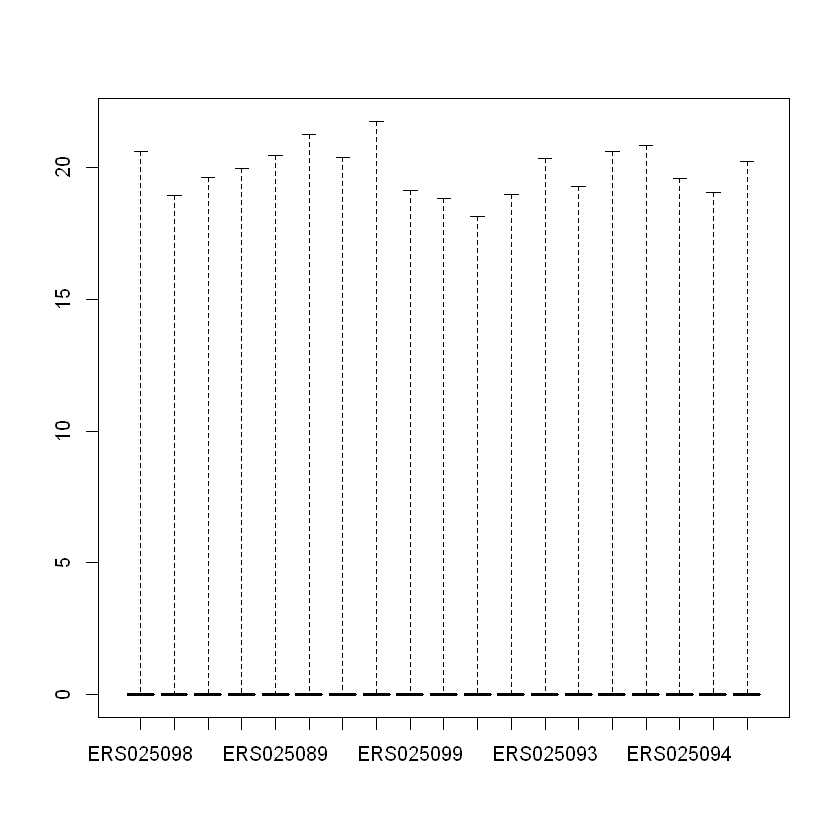

In [28]:
boxplot(log2(edata + 1),col=2,range=0)

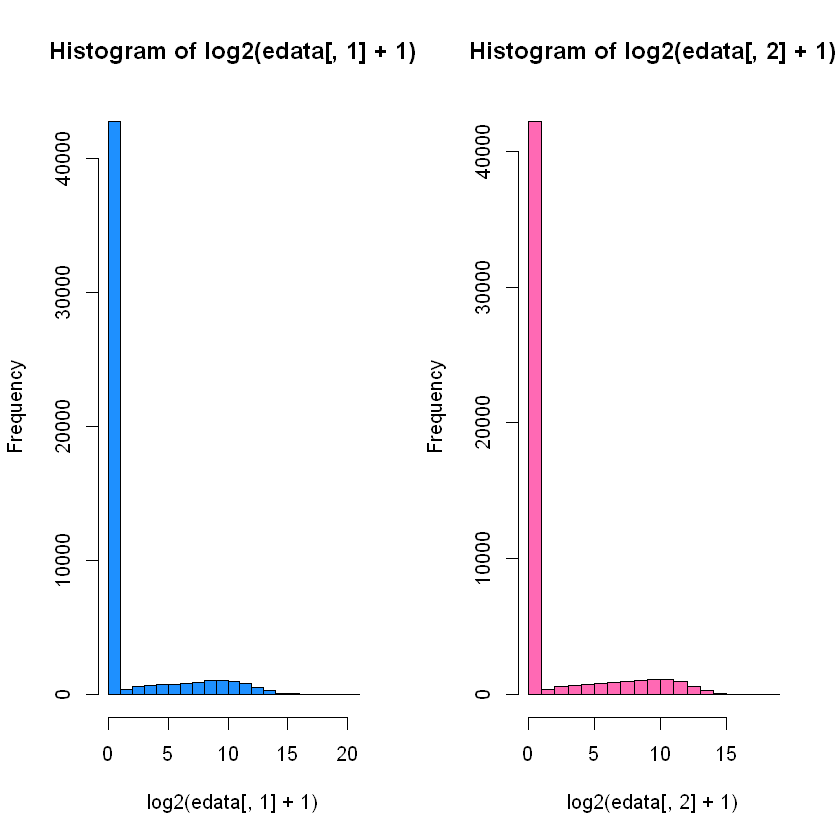

In [29]:
par(mfrow = c(1,2))
hist(log2(edata[,1]+1),col = 2) # col (color)
hist(log2(edata[,2]+1),col = 3)

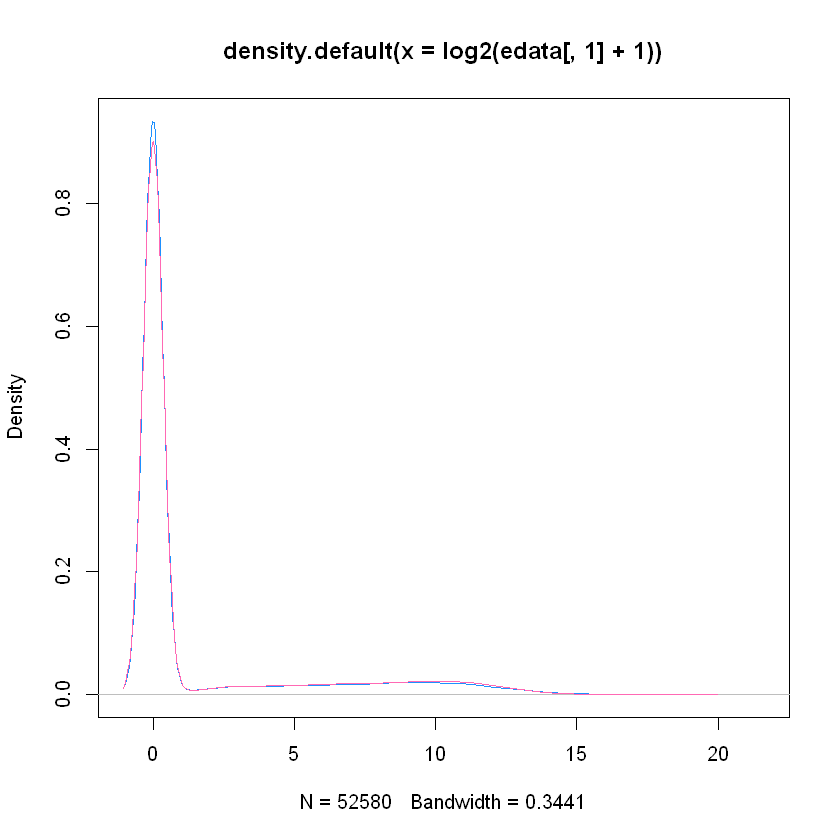

In [32]:
# density plot
plot(density(log2(edata[,1]+1)),col=2)
lines(density(log2(edata[,2]+1)),col=3)


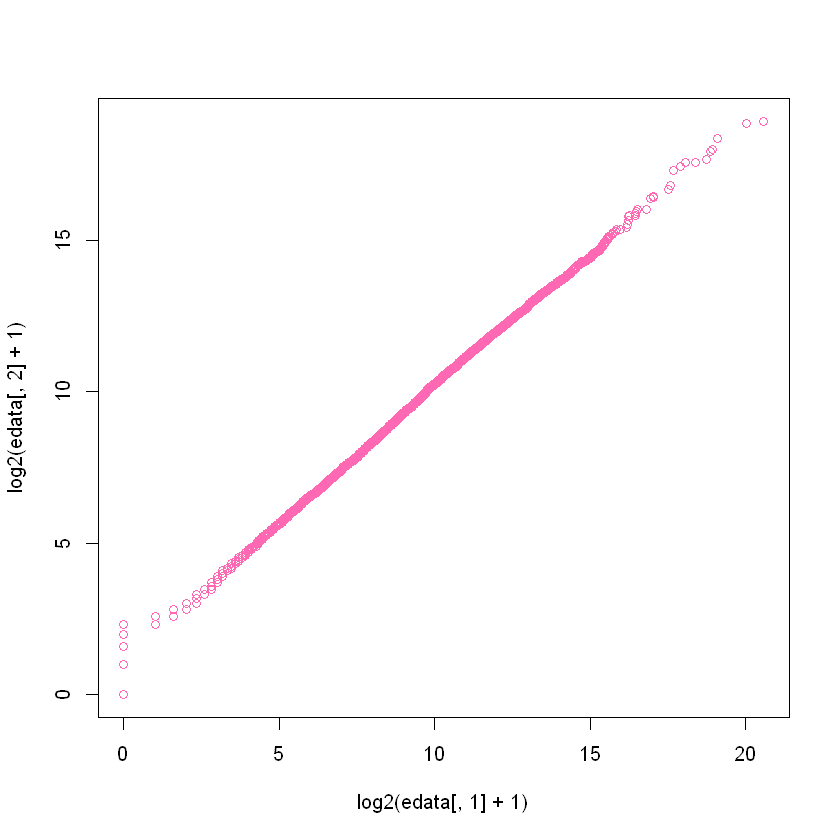

In [33]:
# Quantile Quantile plot
# A very common task is to compare distributions of measurements (say before normalization). You can do this with a qq-plot

qqplot(log2(edata[,1]+1), log2(edata[,2]+1),col=3)

A very widely used plot is what is known as a [M-A plot](https://en.wikipedia.org/wiki/MA_plot), sometimes called a [Bland Altman plot](https://en.wikipedia.org/wiki/Bland%E2%80%93Altman_plot). The basic idea is to plot the sum of the two values on the x-axis and the difference on the y-axis. This can be used to see any difference between the (samples, averages, etc.) and to see if there is any intensity-specific biases.

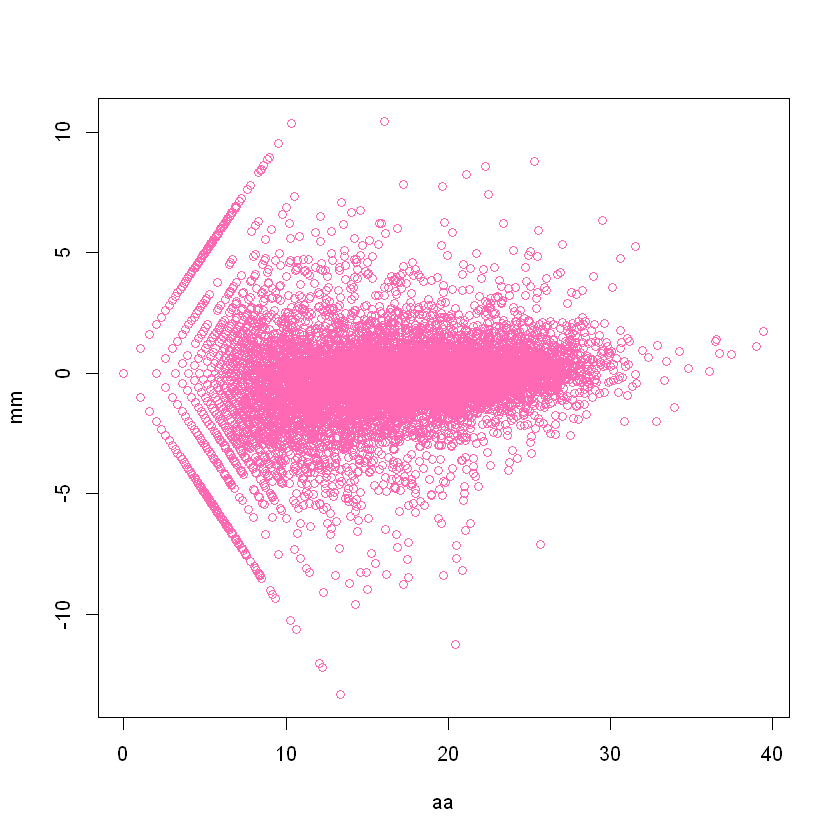

In [35]:
mm = log2(edata[,1]+1) - log2(edata[,2]+1)
aa = log2(edata[,1]+1) + log2(edata[,2]+1)
plot(aa,mm,col=3)

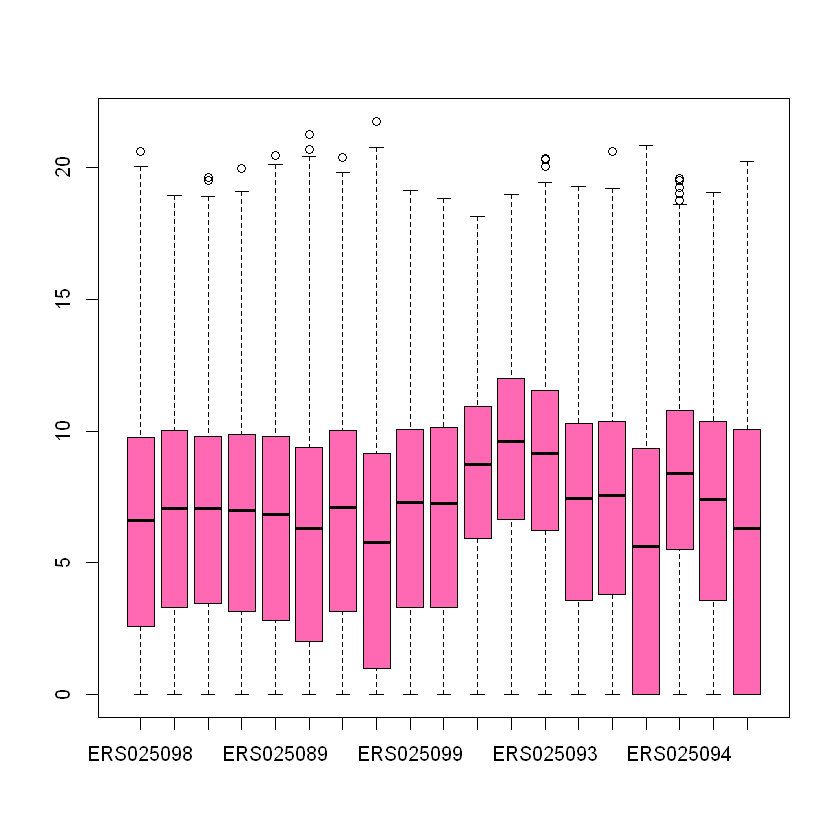

In [25]:
# We can remove rows that are mostly zero and notice any differences in the distributions across samples.


library ("dplyr")

edata = as.data.frame(edata)
filt_edata = filter(edata,rowMeans(edata) > 1)
boxplot(as.matrix(log2(filt_edata+1)),col=3)

### Check for obvious data mixups

Here we are going to do a check to make sure that the men and women are correctly labeled by looking at expression on the Y chromosome. In general you might do several of this type of check to confirm the data are correctly labeled.

Get the chromosomes for each gene using the feature data.


In [26]:
aeid = as.character(fdata[,1])
chr = AnnotationDbi::select(org.Hs.eg.db,keys=aeid,keytype="ENSEMBL",columns="CHR")
head(chr)

Warning message in .deprecatedColsMessage():
"Accessing gene location information via 'CHR','CHRLOC','CHRLOCEND' is
  deprecated. Please use a range based accessor like genes(), or select()
  with columns values like TXCHROM and TXSTART on a TxDb or OrganismDb
  object instead."
'select()' returned 1:many mapping between keys and columns



,ENSEMBL,CHR
,<chr>,<chr>
1,ENSG00000000003,X
2,ENSG00000000005,X
3,ENSG00000000419,20
4,ENSG00000000457,1
5,ENSG00000000460,1
6,ENSG00000000938,1


Filter to the data on chromsome Y and sum up all the counts. A tricky issue is that some genes are annotated to multiple chromsomes. Here we take the first chromsome each is annotated to.

In [27]:
dim(chr)

[1] 52623     2

In [28]:
dim(edata)

[1] 52580    19

In [29]:
# Take non-duplicated chromsomes
chr = chr[!duplicated(chr[,1]),]

# Confirm that the annotation still is in the right order
all(chr[,1] == rownames(edata))

[1] TRUE

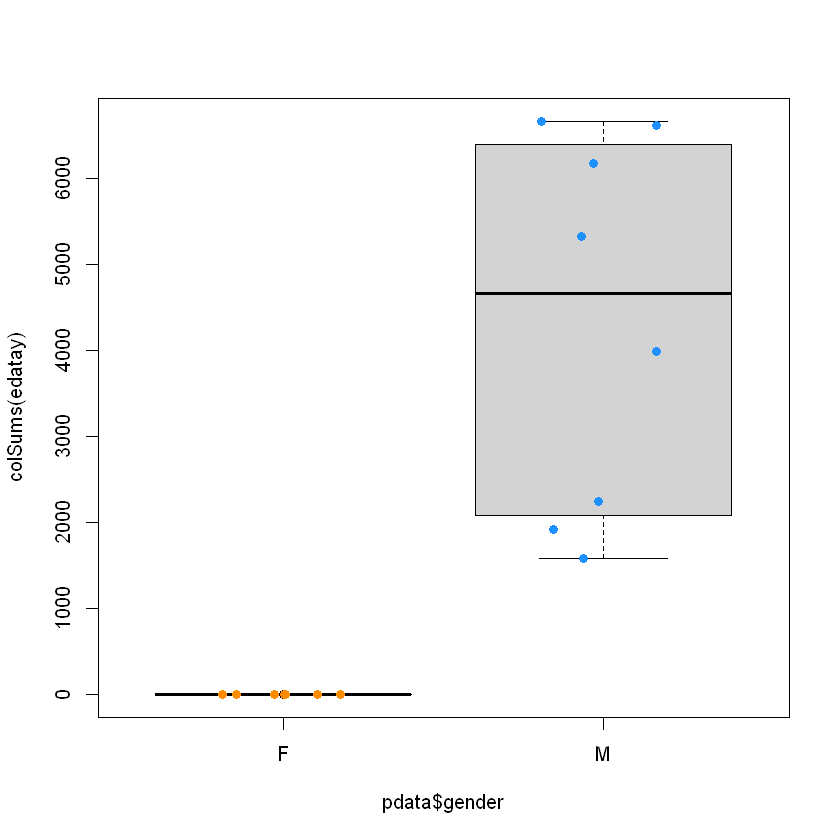

In [30]:
# Select the chromosome Y samples
edatay = dplyr::filter(edata,chr$CHR=="Y")

# Males have Y chromsome expression as expected
boxplot(colSums(edatay) ~ pdata$gender)
points(colSums(edatay) ~ jitter(as.numeric(pdata$gender)),
        col=as.numeric(pdata$gender),
        pch=19)

### Heatmaps
A common type of plot for genomics data is a heatmap. They are usually used for visualizing matrices. For example we can look at all genes with an average number of counts greater than 500:

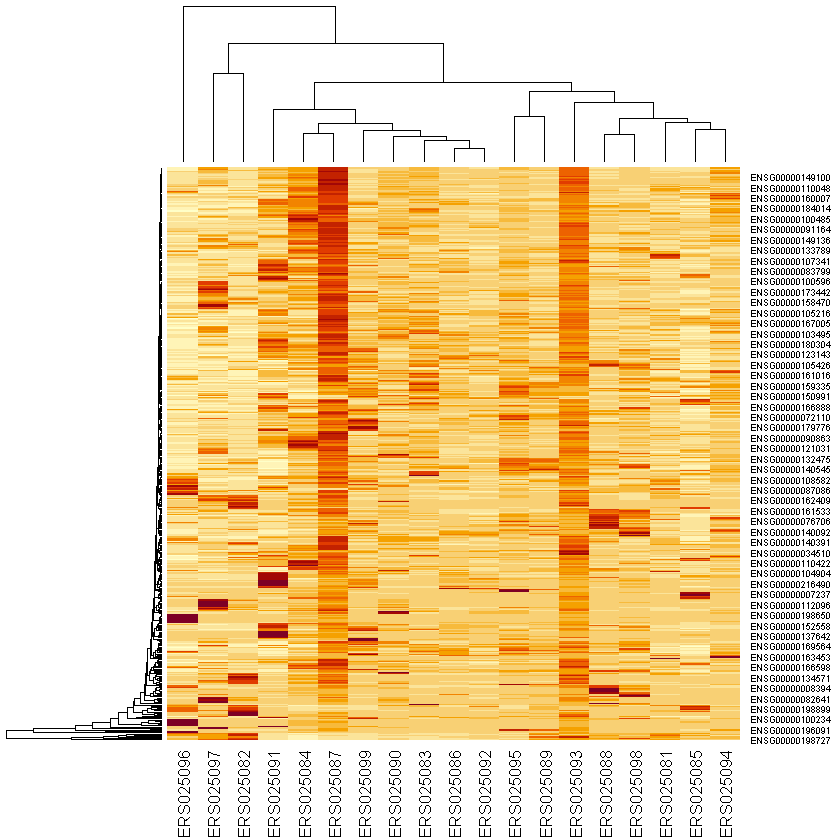

In [31]:
ematrix = as.matrix(edata)[rowMeans(edata) > 10000,]
heatmap(ematrix)

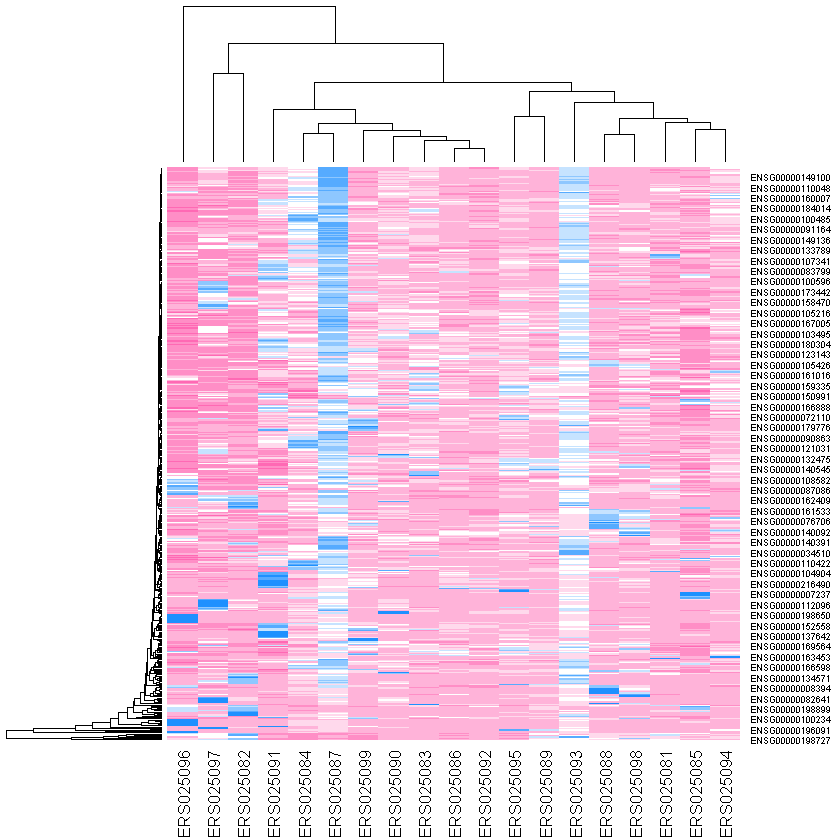

In [32]:
# We might change the coloring since this one is a little hard to see. To do this you have to set up a color palette.

colramp = colorRampPalette(c(3,"white",2))(9)
heatmap(ematrix,col=colramp)

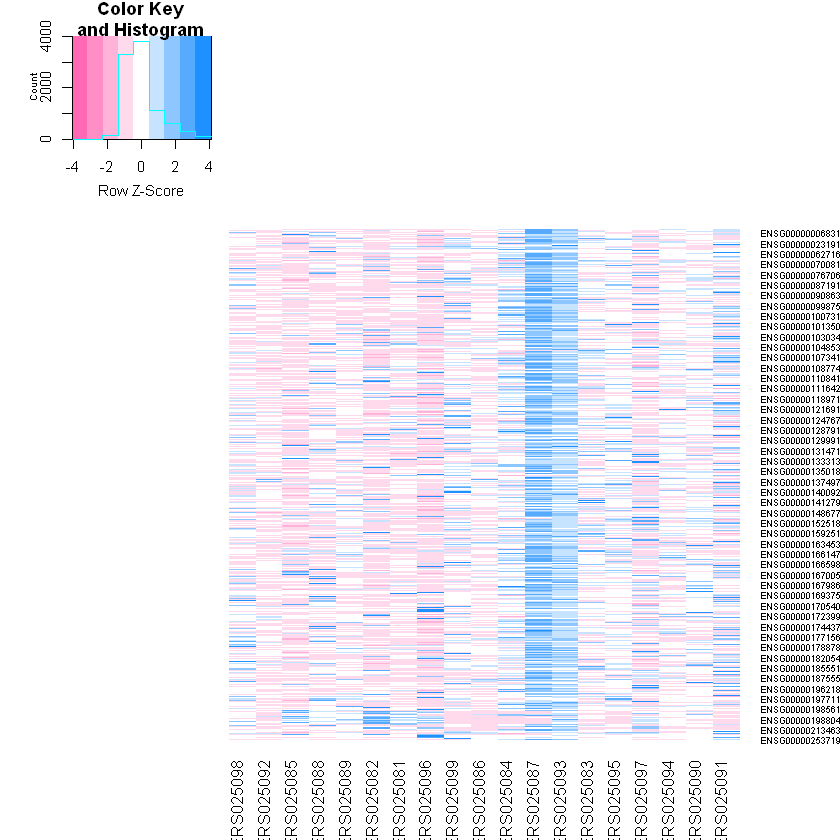

In [33]:
# If you load the gplots package you can add a color scale with the heatmap.2 package. Here we have to add some options to make the dendogram disappear, scale the data by rows, and remove a tracing plot.

heatmap.2(ematrix,col=colramp,Rowv=NA,Colv=NA,
          dendrogram="none", scale="row",trace="none")

### Session Information

In [34]:
devtools::session_info()

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
AnnotationDbi,AnnotationDbi,1.56.2,1.56.2,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/AnnotationDbi,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/AnnotationDbi,TRUE,FALSE,2021-11-09,Bioconductor,TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
assertthat,assertthat,0.2.1,0.2.1,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/assertthat,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/assertthat,FALSE,FALSE,2019-03-21,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
base64enc,base64enc,0.1.3,0.1-3,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/base64enc,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/base64enc,FALSE,FALSE,2015-07-28,CRAN (R 4.1.1),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
Biobase,Biobase,2.54.0,2.54.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/Biobase,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/Biobase,TRUE,FALSE,2021-10-26,Bioconductor,TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
BiocGenerics,BiocGenerics,0.40.0,0.40.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/BiocGenerics,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/BiocGenerics,TRUE,FALSE,2021-10-26,Bioconductor,TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
Biostrings,Biostrings,2.62.0,2.62.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/Biostrings,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/Biostrings,FALSE,FALSE,2021-10-26,Bioconductor,TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
bit,bit,4.0.4,4.0.4,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/bit,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/bit,FALSE,FALSE,2020-08-04,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
bit64,bit64,4.0.5,4.0.5,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/bit64,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/bit64,FALSE,FALSE,2020-08-30,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
bitops,bitops,1.0.7,1.0-7,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/bitops,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/bitops,FALSE,FALSE,2021-04-24,CRAN (R 4.1.1),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1


## C. Data transforms



In [35]:
library(devtools)
library(Biobase)

#### General principles
- Make sure data is on the right scale for
- Visualization
- Statistical modeling


### Loading data


In [36]:
con =url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/bodymap_eset.RData")
load(file=con)
close(con)


bm = bodymap.eset
pdata=pData(bm)
edata=as.data.frame(exprs(bm))
fdata = fData(bm)
ls()

[1] "aeid"         "bm"           "bodymap.eset" "chr"          "colramp"     
 [6] "con"          "edata"        "edatay"       "ematrix"      "fdata"       
[11] "filt_edata"   "pdata"        "trop"

### Skewed distributions
We would like continuous data to be nice and summetric like a normal distribution for two reasons:(1) plots are easier to see this way and (2) most statistical methods are designed to work better for non-skewed data

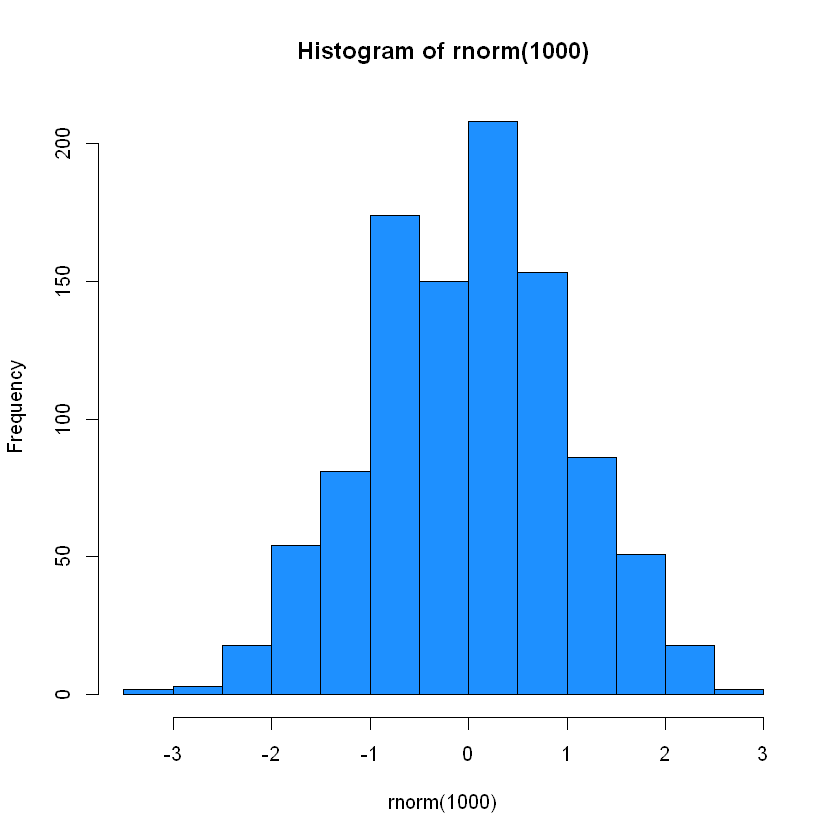

In [37]:
hist(rnorm(1000),col=2)

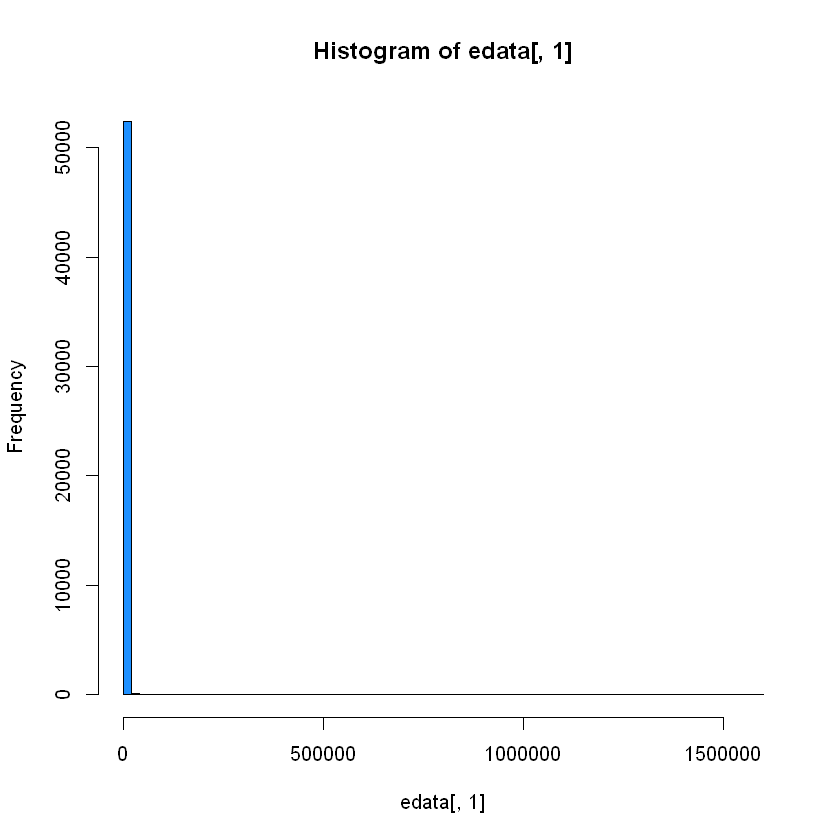

In [38]:
# Realistically though most genomic data is skewed
hist(edata[,1],col=2,breaks=100)

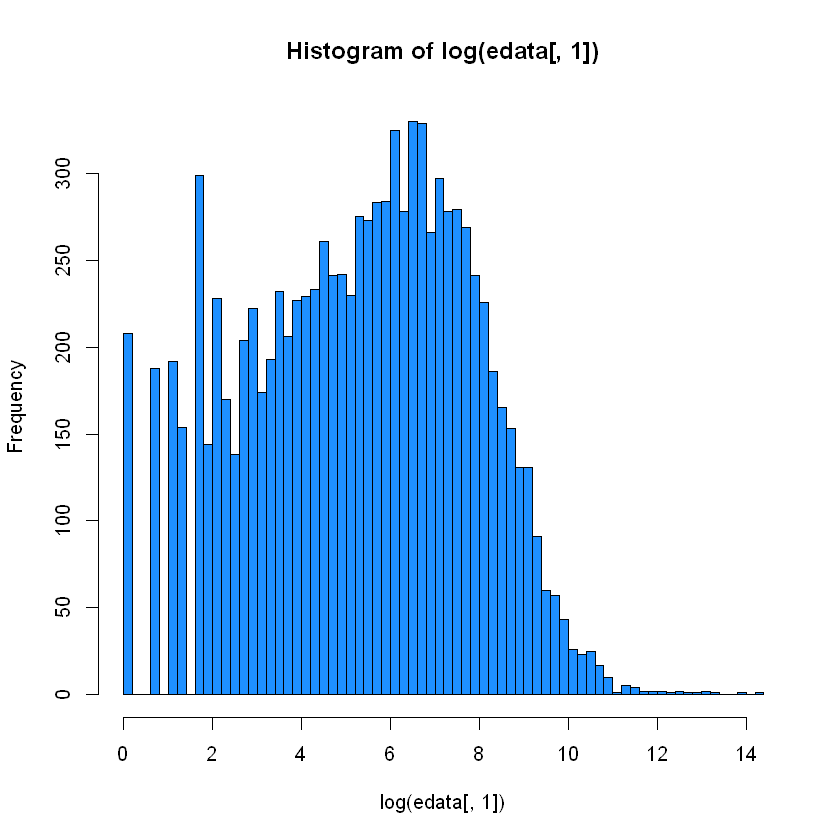

In [39]:
# One way to address this skew is to use a transformation. One common transformation is the log transform.

hist(log(edata[,1]),col=2,breaks=100)

In [40]:
# One thing to be careful with is that values of zero become -inf when you apply the log transform because the log of zero isn’t defined.

min(log(edata))

[1] -Inf

In [42]:
#You can remove this problem by adding a small number to all the counts before taking the log. This doesn’t change the overall distribution much but resolves the zero problem

min(log(edata[,1] + 1))

[1] 0

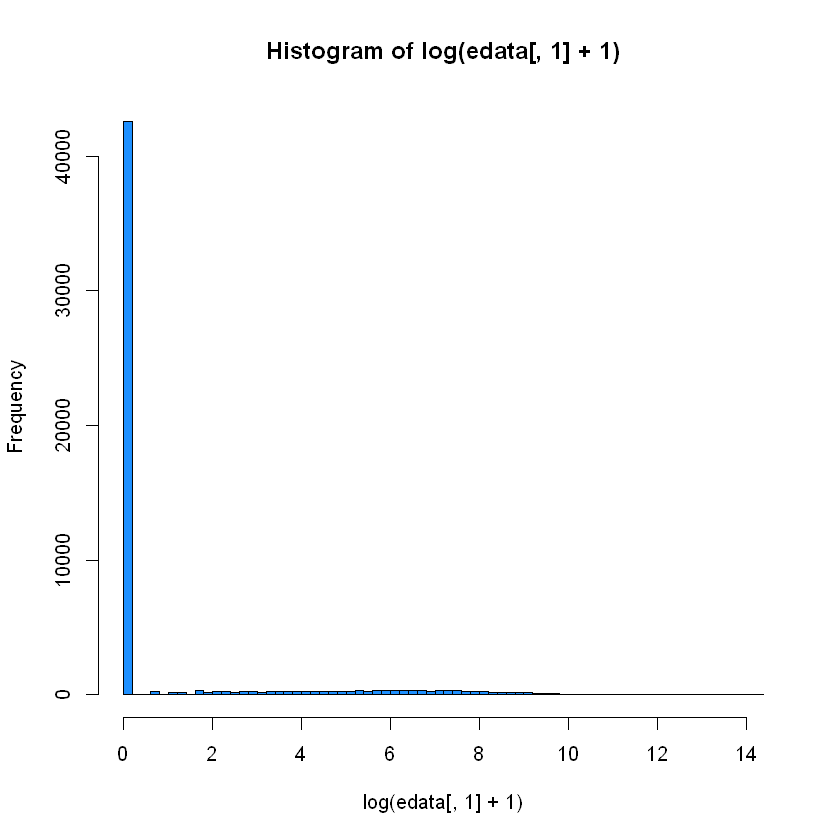

In [43]:
hist(log(edata[,1] + 1),breaks=100,col=2)

A common choice is to use the log2 transform. The reason is that data on the log2 scale can be expressed as **fold changes**. If `log2(x) - log2(y) = z` then there is a z fold change difference between x and y.


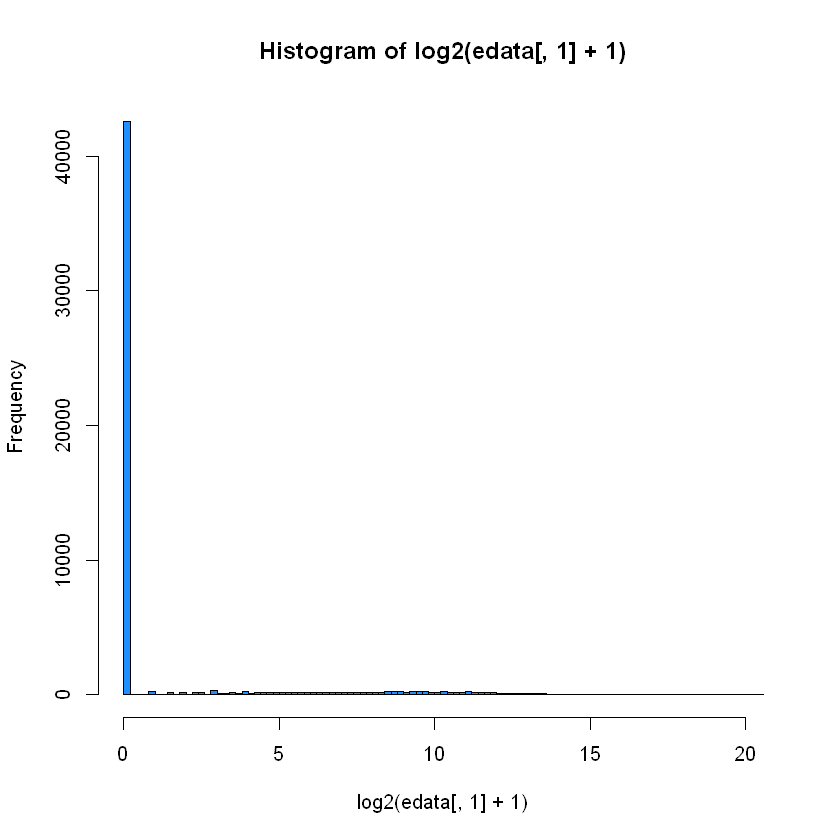

In [44]:
hist(log2(edata[,1] + 1),breaks=100,col=2)

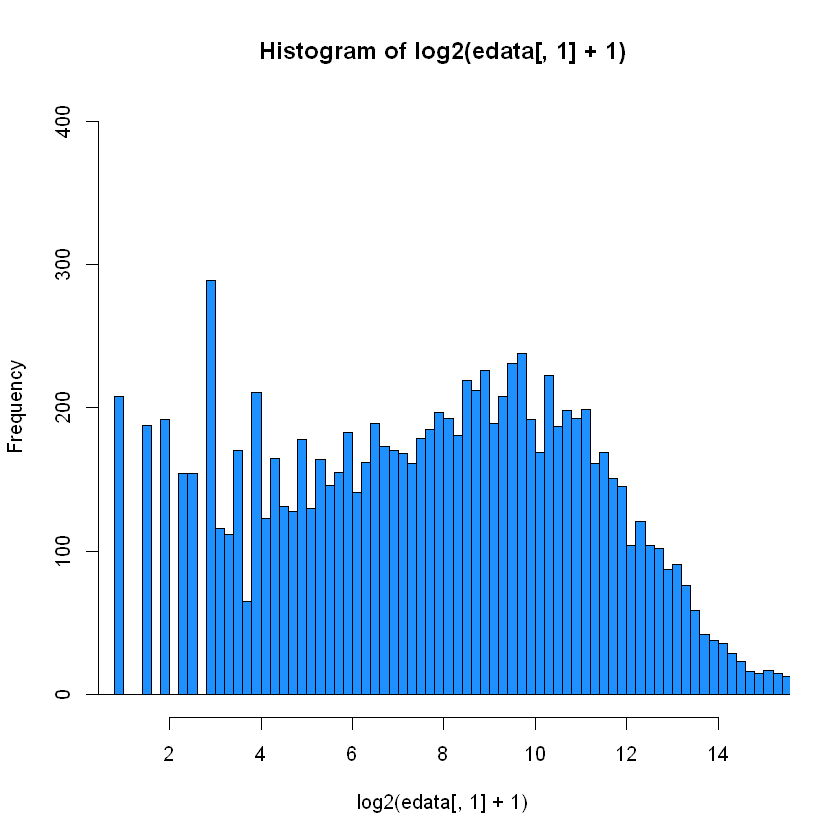

In [45]:
# Let’s zoom in on the values greater than zero (we’ll come back to the zero values in a minute)

hist(log2(edata[,1] + 1),breaks=100,col=2,xlim=c(1,15),ylim=c(0,400))

### Removing features without much data

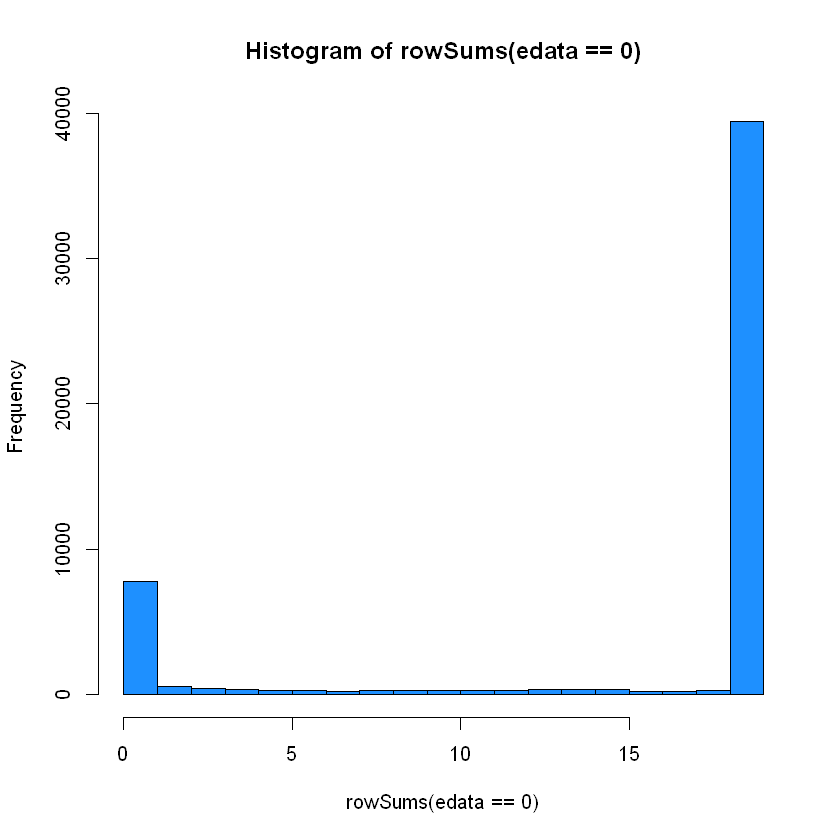

In [46]:
# In many types of sequencing data we observe that there is not much data for many features.

hist(rowSums(edata==0),col=2)

In [51]:
# A common pre-processing technique is to remove features that don’t have much data. One way to identify and remove them is to use rowMeans and rowMedians

low_genes_by_means = rowMeans(edata) < 5
table(low_genes_by_means)

low_genes_by_means
FALSE  TRUE 
11413 41167 

In [52]:
# ! is used as not operator
filt_edata = filter(edata,!low_genes_by_means) 
dim(filt_edata)

[1] 11413    19

In [53]:
low_genes_by_medians = rowMedians(as.matrix(edata)) < 5
table(low_genes_by_medians,low_genes_by_means)

                    low_genes_by_means
low_genes_by_medians FALSE  TRUE
               FALSE  9844     2
               TRUE   1569 41165

In [54]:
filt_edata2 = filter(edata,!low_genes_by_medians)
dim(filt_edata2)

[1] 9846   19

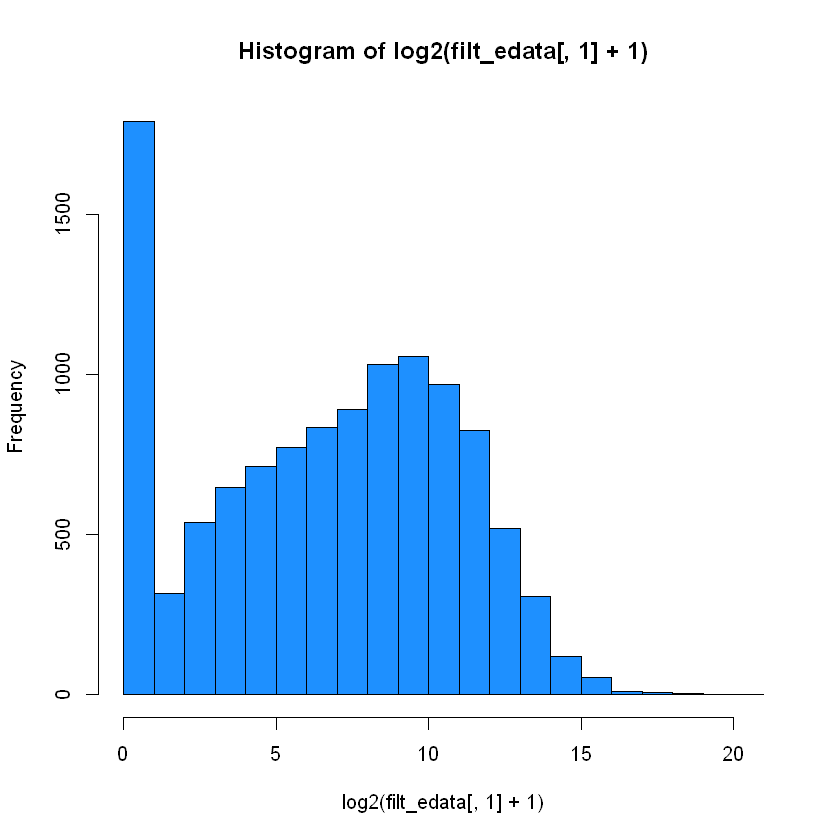

In [55]:
# After filtering we observe that using the log transform makes the distribution much more symmetric but there are still zeros. We could increase the filter to remove this issue if we needed to.

hist(log2(filt_edata[,1] + 1),col=2)

### More transforms
There are a large number of other transforms depending on the type of data you are using. Some common ones are:

- [Variance stabilizing transforms](https://en.wikipedia.org/wiki/Variance-stabilizing_transformation) which seek to remove a mean variance relationship among the data
- [Box-Cox](https://en.wikipedia.org/wiki/Power_transform) transforms which seek to make the data approximately Normally distributed
- [rlog transform](https://rdrr.io/bioc/DESeq2/man/rlog.html) - unique to genomics count data, this is a regularized version of the log transform that seeks to minimize differences at low count levels.
Session i

### Session Information



In [56]:
devtools::session_info()

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
AnnotationDbi,AnnotationDbi,1.56.2,1.56.2,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/AnnotationDbi,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/AnnotationDbi,TRUE,FALSE,2021-11-09,Bioconductor,TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
assertthat,assertthat,0.2.1,0.2.1,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/assertthat,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/assertthat,FALSE,FALSE,2019-03-21,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
base64enc,base64enc,0.1.3,0.1-3,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/base64enc,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/base64enc,FALSE,FALSE,2015-07-28,CRAN (R 4.1.1),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
Biobase,Biobase,2.54.0,2.54.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/Biobase,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/Biobase,TRUE,FALSE,2021-10-26,Bioconductor,TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
BiocGenerics,BiocGenerics,0.40.0,0.40.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/BiocGenerics,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/BiocGenerics,TRUE,FALSE,2021-10-26,Bioconductor,TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
Biostrings,Biostrings,2.62.0,2.62.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/Biostrings,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/Biostrings,FALSE,FALSE,2021-10-26,Bioconductor,TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
bit,bit,4.0.4,4.0.4,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/bit,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/bit,FALSE,FALSE,2020-08-04,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
bit64,bit64,4.0.5,4.0.5,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/bit64,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/bit64,FALSE,FALSE,2020-08-30,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
bitops,bitops,1.0.7,1.0-7,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/bitops,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/bitops,FALSE,FALSE,2021-04-24,CRAN (R 4.1.1),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1


## D. Clustering

In [2]:
# To install these packages you can use the code
install.packages("dendextend")

Installing package into 'C:/Users/etuca/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'dendextend' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\etuca\AppData\Local\Temp\RtmpOOuhBa\downloaded_packages


In [3]:
library(devtools)
library(Biobase)
library(dendextend)

Warning message:
"package 'dendextend' was built under R version 4.1.2"

---------------------
Welcome to dendextend version 1.15.2
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: 'dendextend'


The following object is masked from 'package:stats':

    cutree




### Load some data

In [4]:
con =url("http://bowtie-bio.sourceforge.net/recount/ExpressionSets/bodymap_eset.RData")
load(file=con)
close(con)
bm = bodymap.eset
pdata=pData(bm)
edata=as.data.frame(exprs(bm))
fdata = fData(bm)
ls()

[1] "bm"           "bodymap.eset" "con"          "edata"        "fdata"       
[6] "pdata"

### Calculate distances between samples
- Most important step
- Garbage in -> garbage out
- Distance or similarity
- Continuous - euclidean distance
- Continous - correlation similarity
- Binary - manhattan distance
- Pick a distance/similarity that makes sense for your problem

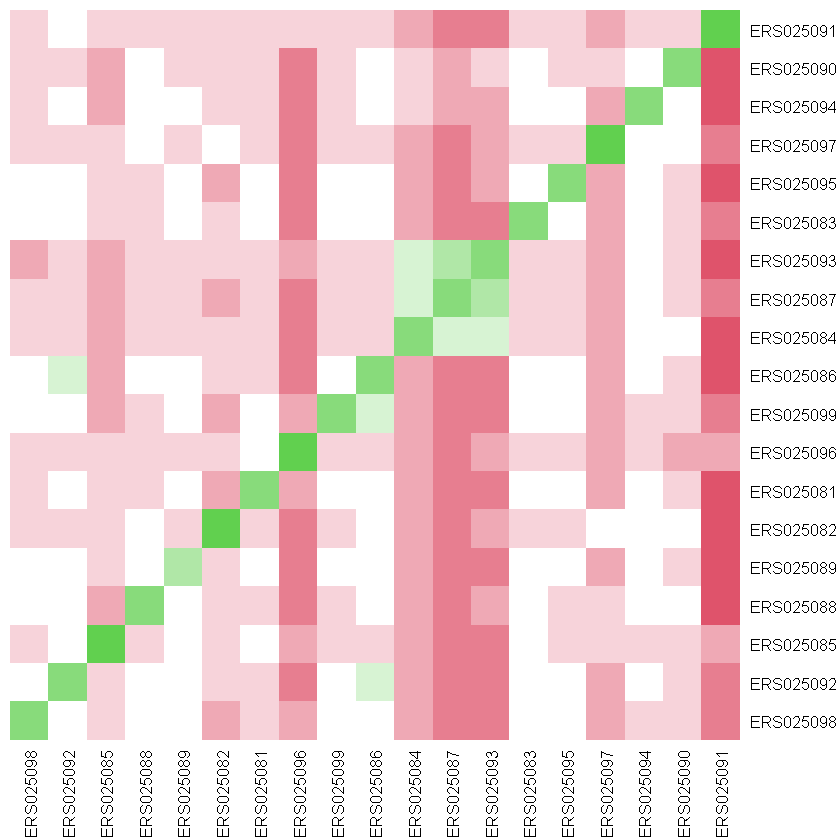

In [5]:
# First we log transform and remove lowly expressed genes, then calculate Euclidean distance

edata = edata[rowMeans(edata) > 5000,]
edata = log2(edata + 1)

# By default calculates the distance between rows
dist1 = dist(t(edata))

## Look at distance matrix
colramp = colorRampPalette(c(3,"white",2))(9)
heatmap(as.matrix(dist1),col=colramp,Colv=NA,Rowv=NA)

### Now cluster the samples
Here we use the distance we previously calculated to perform a hierarchical clustering and plot the dendrogram:

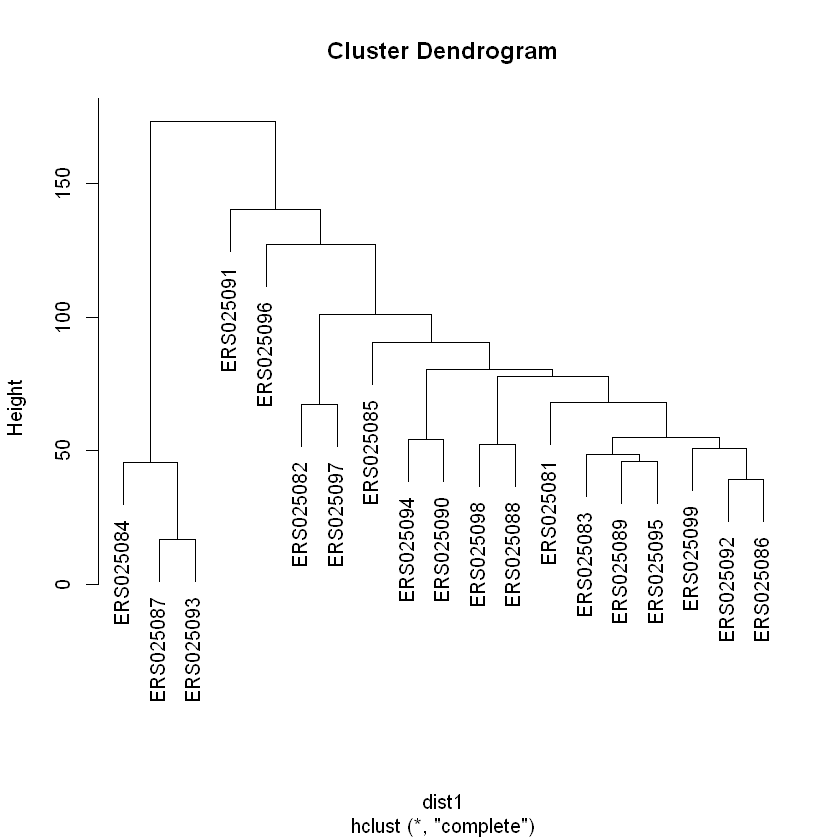

In [6]:
hclust1 = hclust(dist1)
plot(hclust1)

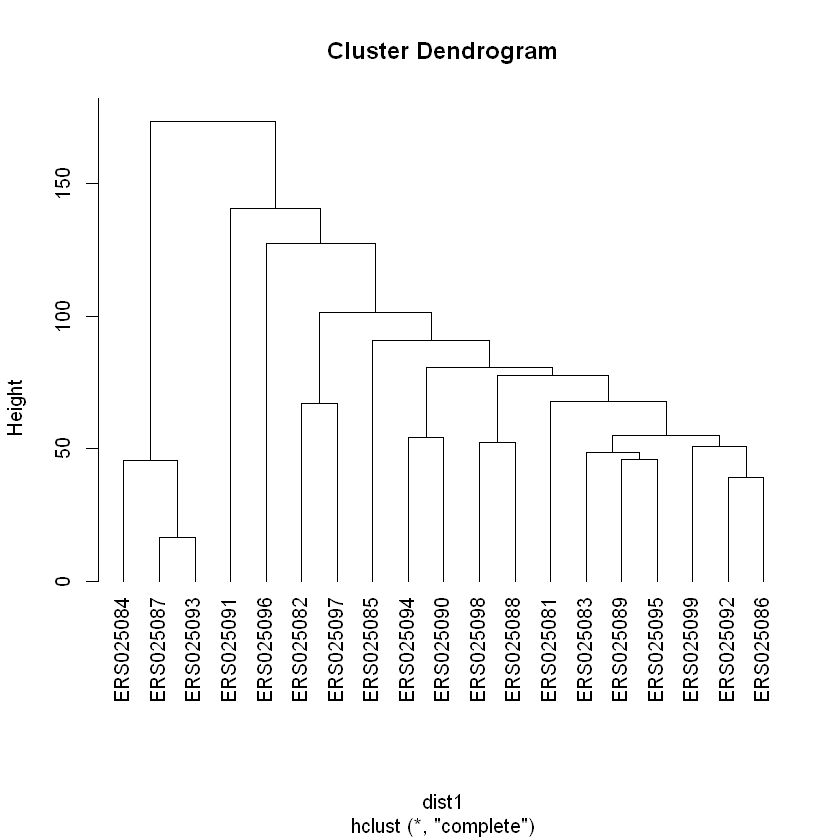

In [7]:
# We can also force all of the leaves to terminate at the same spot
plot(hclust1,hang=-1)

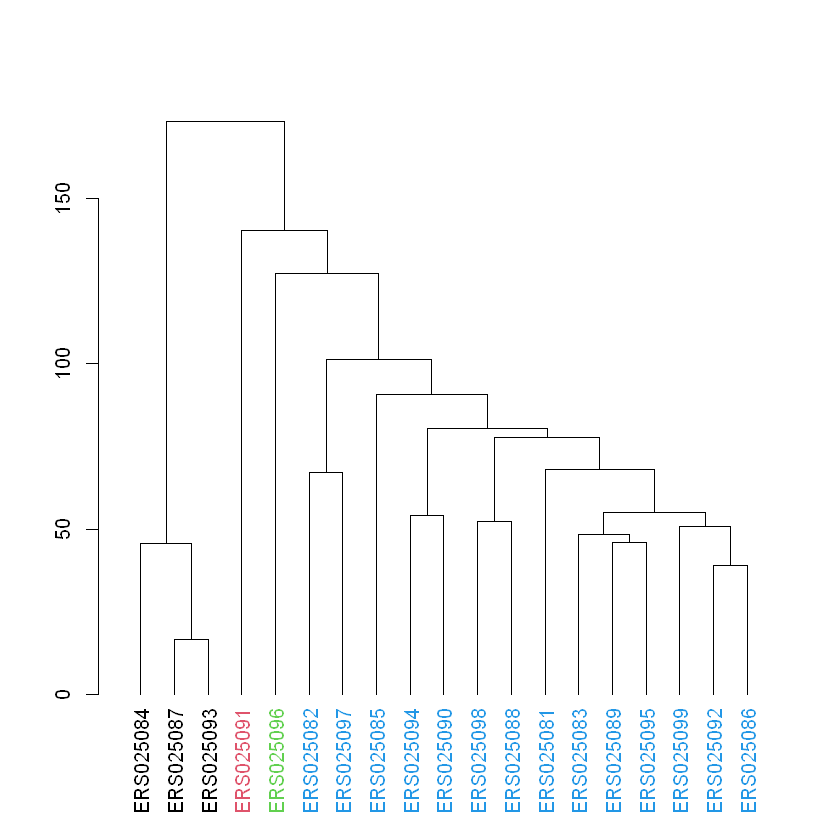

In [8]:
# We can also color the dendrogram either into a fixed number of groups

dend = as.dendrogram(hclust1)
dend = color_labels(hclust1,4,col=1:4)
plot(dend)

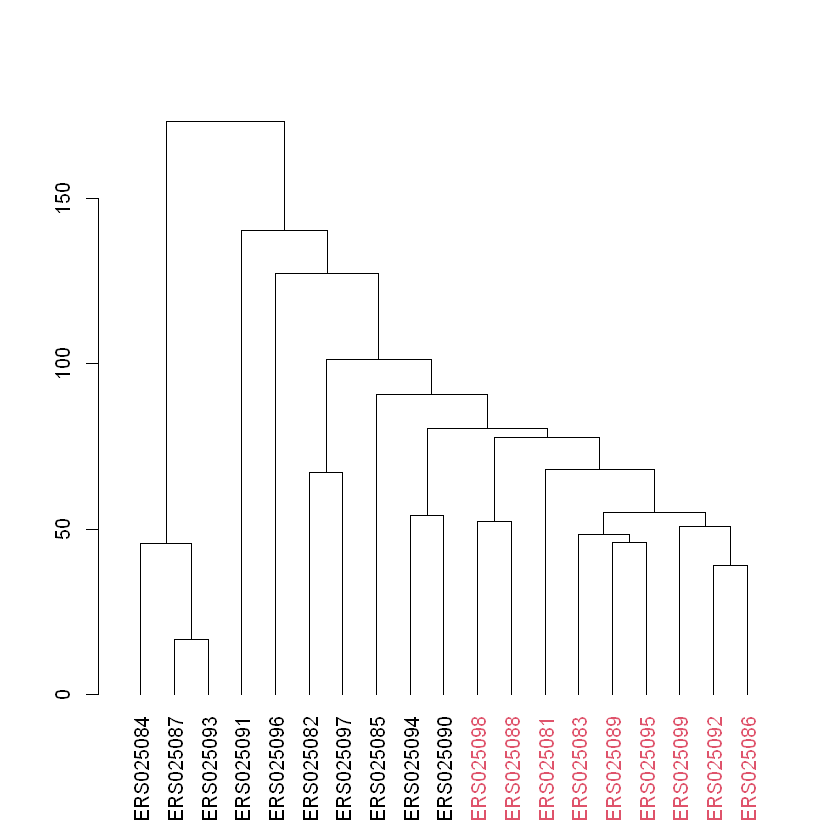

In [9]:
# Or you can color them directly
labels_colors(dend) = c(rep(1,10),rep(2,9))
plot(dend)

### K-mean Clustering
By default, the rows are clustered. One can put number of cluster by using `centers` parameter.

In [13]:
kmeans.cluster = kmeans(edata,centers = 3)
names(kmeans.cluster)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

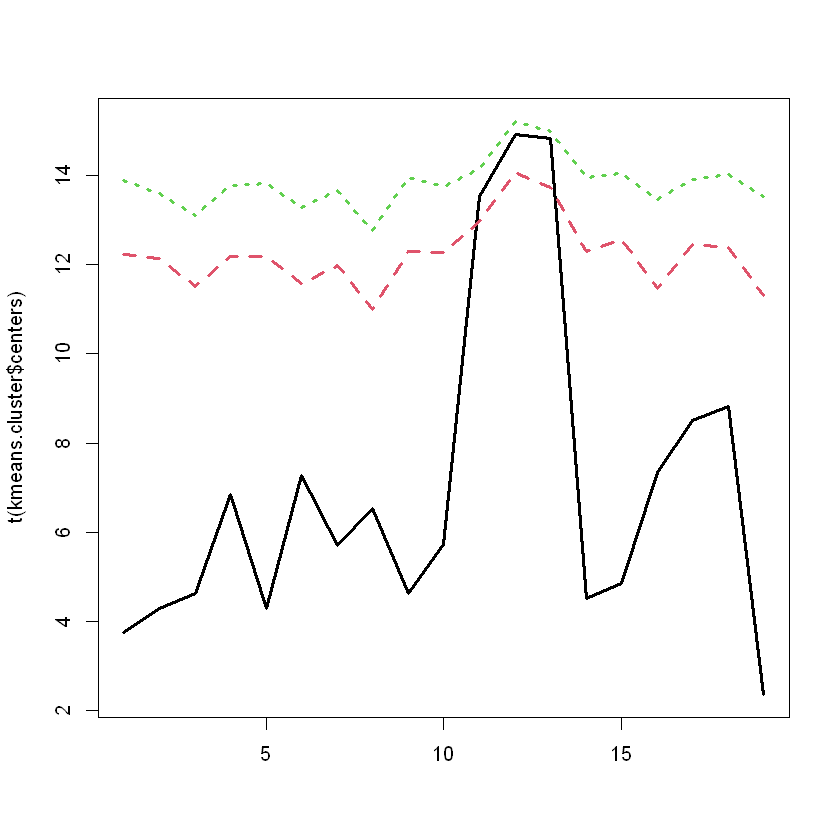

In [14]:
# One can plot at the cluster centers

matplot(t(kmeans.cluster$centers),col=1:3,type='l',lwd=3)

In [15]:
# also look at how many belongs to each cluster.
table(kmeans.cluster$cluster)


  1   2   3 
 63 745 390 

In [18]:
library(RSkittleBrewer)
trop = RSkittleBrewer("tropical")
palette(trop)

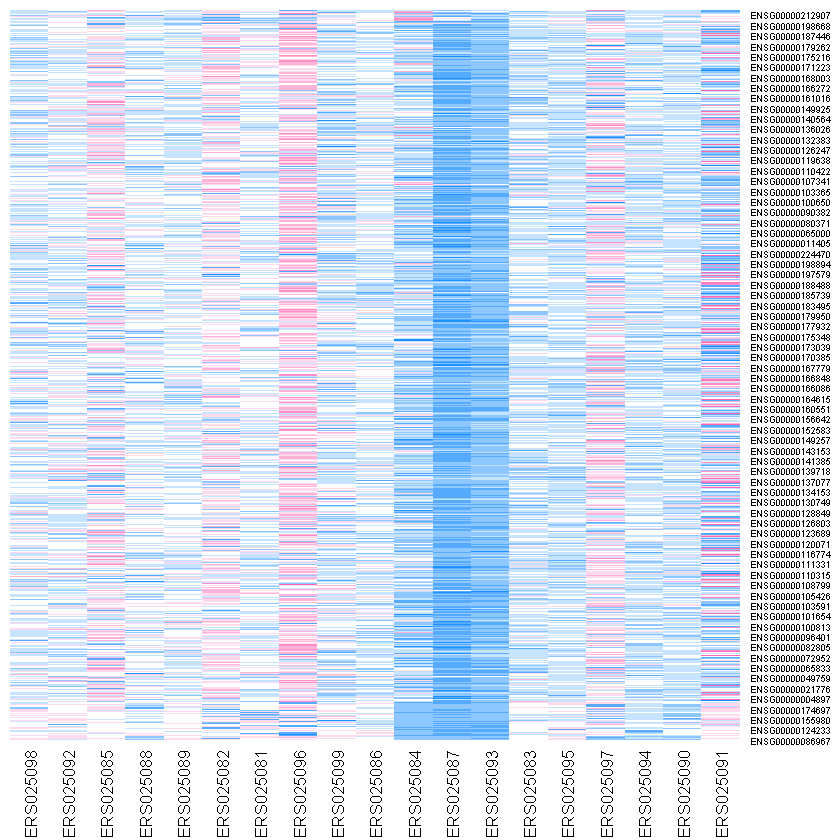

In [19]:
# and cluster the data together and plot
colramp = colorRampPalette(c(3,'white',2))(9)
heatmap(as.matrix(edata)[order(kmeans.cluster$cluster),], col = colramp, Colv = NA, Rowv = NA)

# Session Information

In [20]:
devtools::session_info()

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
assertthat,assertthat,0.2.1,0.2.1,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/assertthat,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/assertthat,FALSE,FALSE,2019-03-21,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
base64enc,base64enc,0.1.3,0.1-3,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/base64enc,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/base64enc,FALSE,FALSE,2015-07-28,CRAN (R 4.1.1),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
Biobase,Biobase,2.54.0,2.54.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/Biobase,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/Biobase,TRUE,FALSE,2021-10-26,Bioconductor,TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
BiocGenerics,BiocGenerics,0.40.0,0.40.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/BiocGenerics,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/BiocGenerics,TRUE,FALSE,2021-10-26,Bioconductor,TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
brio,brio,1.1.3,1.1.3,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/brio,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/brio,FALSE,FALSE,2021-11-30,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
cachem,cachem,1.0.6,1.0.6,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/cachem,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/cachem,FALSE,FALSE,2021-08-19,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
callr,callr,3.7.0,3.7.0,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/callr,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/callr,FALSE,FALSE,2021-04-20,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
cli,cli,3.1.1,3.1.1,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/cli,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/cli,FALSE,FALSE,2022-01-20,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
colorspace,colorspace,2.0.2,2.0-2,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/colorspace,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1/colorspace,FALSE,FALSE,2021-06-24,CRAN (R 4.1.2),TRUE,C:/Users/etuca/OneDrive/Documents/R/win-library/4.1
